3. DATA PREPARATION


Importing relevant libraries

In [47]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline


from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
import string
from nltk import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentAnalyzer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

#warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bee\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Bee\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Loading the Dataset

In [48]:
df=pd.read_csv("judge-1377884607_tweet_product_company.csv",encoding='ISO-8859-1')#since the default encoding used by pandas(utf-8) could not decode the byte in the csv filr
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [49]:
#Checking the Dataset status
class DataFrameChecker:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def check_info(self):
        print("DataFrame Info:")
        self.dataframe.info()

    def check_shape(self):
        print(f"DataFrame Shape: {self.dataframe.shape}")

    def check_describe(self):
        print("DataFrame Description:")
        print(self.dataframe.describe())
    def check_nulls(self):
        print("Null Values in DataFrame:")
        print(self.dataframe.isnull().sum())

    def check_duplicates(self):
        duplicate_rows = self.dataframe[self.dataframe.duplicated()]
        print(f"Number of Duplicate Rows: {duplicate_rows.shape[0]}")
        if duplicate_rows.shape[0] > 0:
            print("Duplicate Rows:")
            print(duplicate_rows)


    # Create an instance of DataFrameChecker
checker = DataFrameChecker(df)

    # Use the methods
print(checker.check_info())
print(checker.check_shape())
print(checker.check_describe())
print(checker.check_nulls())
print(checker.check_duplicates())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
None
DataFrame Shape: (9093, 3)
None
DataFrame Description:
                                               tweet_text  \
count                                                9092   
unique                                               9065   
top     RT @mention Marissa Mayer: Google Will Connect...   
freq                                                    5   

       emotion_in_tweet_is_directed_at  \
count                       

3.1 Data Cleaning "emotion_in_tweet_is_directed_at" Column

In [50]:
df["emotion_in_tweet_is_directed_at"].value_counts()

emotion_in_tweet_is_directed_at
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64

Categorizing the brands to either Apple or Google products

In [51]:
product_category={
    "iPhone":"Apple", 
    "iPad":"Apple",
    "iPad or iPhone App":"Apple", 
    "Other Apple product or service": "Apple",
    "Android":"Google", 
    "Android App":"Google", 
    "Other Google product or service":"Google"
}
df["brand"]=df["emotion_in_tweet_is_directed_at"].replace(product_category)

               
print(df["brand"].value_counts())
print(df.info())

brand
Apple     2409
Google     882
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 4 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
 3   brand                                               3291 non-null   object
dtypes: object(4)
memory usage: 284.3+ KB
None


Dealing with missing values in the brand column

In [52]:
filtered_df=df[df["brand"].isna()]
filtered_df.head(100)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,brand
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product,NaN
6,NaN,NaN,No emotion toward brand or product,NaN
16,Holler Gram for iPad on the iTunes App Store -...,NaN,No emotion toward brand or product,NaN
32,"Attn: All #SXSW frineds, @mention Register fo...",NaN,No emotion toward brand or product,NaN
33,Anyone at #sxsw want to sell their old iPad?,NaN,No emotion toward brand or product,NaN
...,...,...,...,...
186,Currently 150 people in line at the &quot;Pop ...,NaN,No emotion toward brand or product,NaN
187,Only iPad 2 available at #sxsw is the 64GB wif...,NaN,No emotion toward brand or product,NaN
188,÷¼ We love 2 entertain youÛ_Please donÛªt b...,NaN,No emotion toward brand or product,NaN
189,Less than 2 hours until we announce the detail...,NaN,No emotion toward brand or product,NaN


Dropping the 'emotion_in_tweet_is_directed_at' column since the 'brand' column is a replacement of it.

In [53]:
df.drop(columns=['emotion_in_tweet_is_directed_at'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
 2   brand                                               3291 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


From the filtered_df there are words in the tweet_text column that can help identify the brand.
For example, if the tweet_text contains the word "iPhone," it's likely an Apple brand. Similarly, if the tweet_text contains the word "Android," it's likely a Google brand.

In [54]:
class KeywordBrandAssigner:
    def __init__(self, keyword_to_brand):
        self.keyword_to_brand = keyword_to_brand  # Mapping from keywords to brands

    def assign_brands(self, df):
        for index, row in df.iterrows():
            text = row['tweet_text']
            if pd.isna(row['brand']) and isinstance(text, str):
                text_lower = text.lower()
                for keyword, brand in self.keyword_to_brand.items():
                    if keyword in text_lower:
                        df.at[index, 'brand'] = brand
                        break
        # Fill any remaining NaN values with 'Unknown'
        df['brand'] = df['brand'].fillna('Unknown')

# Example usage
keyword_to_brand = {
    'google': 'Google',
    'apple': 'Apple',
    'ipad': 'Apple',
    'itunes': 'Apple',
    'android': 'Google',
    'iphone': 'Apple'
}

assigner = KeywordBrandAssigner(keyword_to_brand)
assigner.assign_brands(df)


The KeywordBrandAssigner class maps specific keywords to their corresponding brands ("Apple" or "Google") based on the keyword_to_brand dictionary and assigns these brands to the 'brand' column of the DataFrame when a keyword is found in the tweet text. It ensures that any missing or unmatched values in the 'brand' column are filled with "Unknown.

In [55]:
#reloading the dataset
df["brand"].value_counts()

brand
Apple      5440
Google     2946
Unknown     707
Name: count, dtype: int64

In [56]:
#Dropping the unknown 
df = df[df['brand'] != 'Unknown']
df['brand'].value_counts()

brand
Apple     5440
Google    2946
Name: count, dtype: int64

Dropped the rows with unknown values since i'm focussed with tweets having information about either Google or Apple

In [57]:
#Reloading the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8386 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          8386 non-null   object
 1   is_there_an_emotion_directed_at_a_brand_or_product  8386 non-null   object
 2   brand                                               8386 non-null   object
dtypes: object(3)
memory usage: 262.1+ KB


Checking and Dropping of Duplicates

In [58]:
print(df.duplicated().value_counts())
print(df.drop_duplicates(inplace=True))
print(df.shape)

False    8366
True       20
Name: count, dtype: int64
None
(8366, 3)


C:\Users\Bee\AppData\Local\Temp\ipykernel_14744\1557657433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  print(df.drop_duplicates(inplace=True))


In [59]:
df.duplicated().value_counts()

False    8366
Name: count, dtype: int64

3.2 Data Cleaning "is there an emotion directed at a brand or product" column.

In [60]:
df["is_there_an_emotion_directed_at_a_brand_or_product"].value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    4688
Positive emotion                      2960
Negative emotion                       568
I can't tell                           150
Name: count, dtype: int64

There are 4 classifiers(no emotion,positive,negative and I can't tell), I need a binary classifier model.

To build a binary classifier, I need to consolidate the existing categorical emotions into two distinct classes. Specifically, I will categorize "Positive emotion" as the positive class, while grouping "No emotion toward brand or product," "Negative emotion," and "I can't tell" into the non-positive class. This transformation will simplify the classification task and enable the development of a binary emotion classifier.

In [61]:
Emotions={
    "No emotion toward brand or product":"Non-Positive",
    "Positive emotion":"Positive",
    "Negative emotion":"Non-Positive",
    "I can't tell":"Non-Positive"
}
df.loc[:,"is_there_an_emotion_directed_at_a_brand_or_product"] = df["is_there_an_emotion_directed_at_a_brand_or_product"].map(Emotions)
               
print(df["is_there_an_emotion_directed_at_a_brand_or_product"].value_counts(normalize=True))




is_there_an_emotion_directed_at_a_brand_or_product
Non-Positive    0.646187
Positive        0.353813
Name: proportion, dtype: float64


Creating a copy of the cleaned data

In [62]:
cleaned_data =df.copy()
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8366 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          8366 non-null   object
 1   is_there_an_emotion_directed_at_a_brand_or_product  8366 non-null   object
 2   brand                                               8366 non-null   object
dtypes: object(3)
memory usage: 261.4+ KB


## EXPLAROTORY DATA ANALYSIS

### Tokenizing

The initial step in preparing the dataset for summarization involves breaking each tweet (currently stored as a text string in the overall table) into individual tokens, separated by commas, and then repopulating each row in the dataframe as a list of tokens. The tokenizer uses a regular expression pattern to split words by non-letter characters while preserving apostrophes within words where relevant. 

Areas of focus  for the preprocessing phase:

i. Tokenizing the tweet texts using 'Tweet Tokenizer' that handles hastages('#') and mentions ('@').

ii. Removing basic Stop Words.

In [63]:
# Initializing Tokenizer

tknzr = TweetTokenizer(strip_handles = True, preserve_case = False)
df['Tokens'] = df['tweet_text'].apply(tknzr.tokenize)

# Function for getting the 20 most common words in the tweets

def get_most_common_words(df, column_name):
     # Concatenating the list of tokens into a single list
    all_tokens = [token for tokens in df[column_name] for token in tokens]

    # Calculate the frequency distribution
    freq_dist = FreqDist(all_tokens)

    # Get the top N common words
    most_common_words = freq_dist.most_common

    return most_common_words

# applying the function
top_words = get_most_common_words(df, 'Tokens')
print(top_words)

C:\Users\Bee\AppData\Local\Temp\ipykernel_14744\3413648160.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tokens'] = df['tweet_text'].apply(tknzr.tokenize)


<bound method Counter.most_common of FreqDist({'#sxsw': 8370, '.': 5638, 'the': 4111, 'link': 3656, '}': 3642, '{': 3639, ',': 3320, 'to': 3289, 'at': 2865, 'rt': 2687, ...})>


In [64]:
df['Tokens']

0       [., i, have, a, 3g, iphone, ., after, 3, hrs, ...
1       [know, about, ?, awesome, ipad, /, iphone, app...
2       [can, not, wait, for, #ipad, 2, also, ., they,...
3       [i, hope, this, year's, festival, isn't, as, c...
4       [great, stuff, on, fri, #sxsw, :, marissa, may...
                              ...                        
9088             [ipad, everywhere, ., #sxsw, {, link, }]
9089    [wave, ,, buzz, ..., rt, we, interrupt, your, ...
9090    [google's, zeiger, ,, a, physician, never, rep...
9091    [some, verizon, iphone, customers, complained,...
9092    [, ï, ¡, , ïà, , ü_, , , ê, , , î, , ...
Name: Tokens, Length: 8366, dtype: object

#### Checking for word frequency

Checking for word frequency of all tokens in the tweet_text column befire removing stop words.

c:\Users\Bee\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 137 (\x89) missing from current font.
  func(*args, **kwargs)
c:\Users\Bee\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 157 (\x9d) missing from current font.
  func(*args, **kwargs)
c:\Users\Bee\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  func(*args, **kwargs)
c:\Users\Bee\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Bee\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Bee\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152

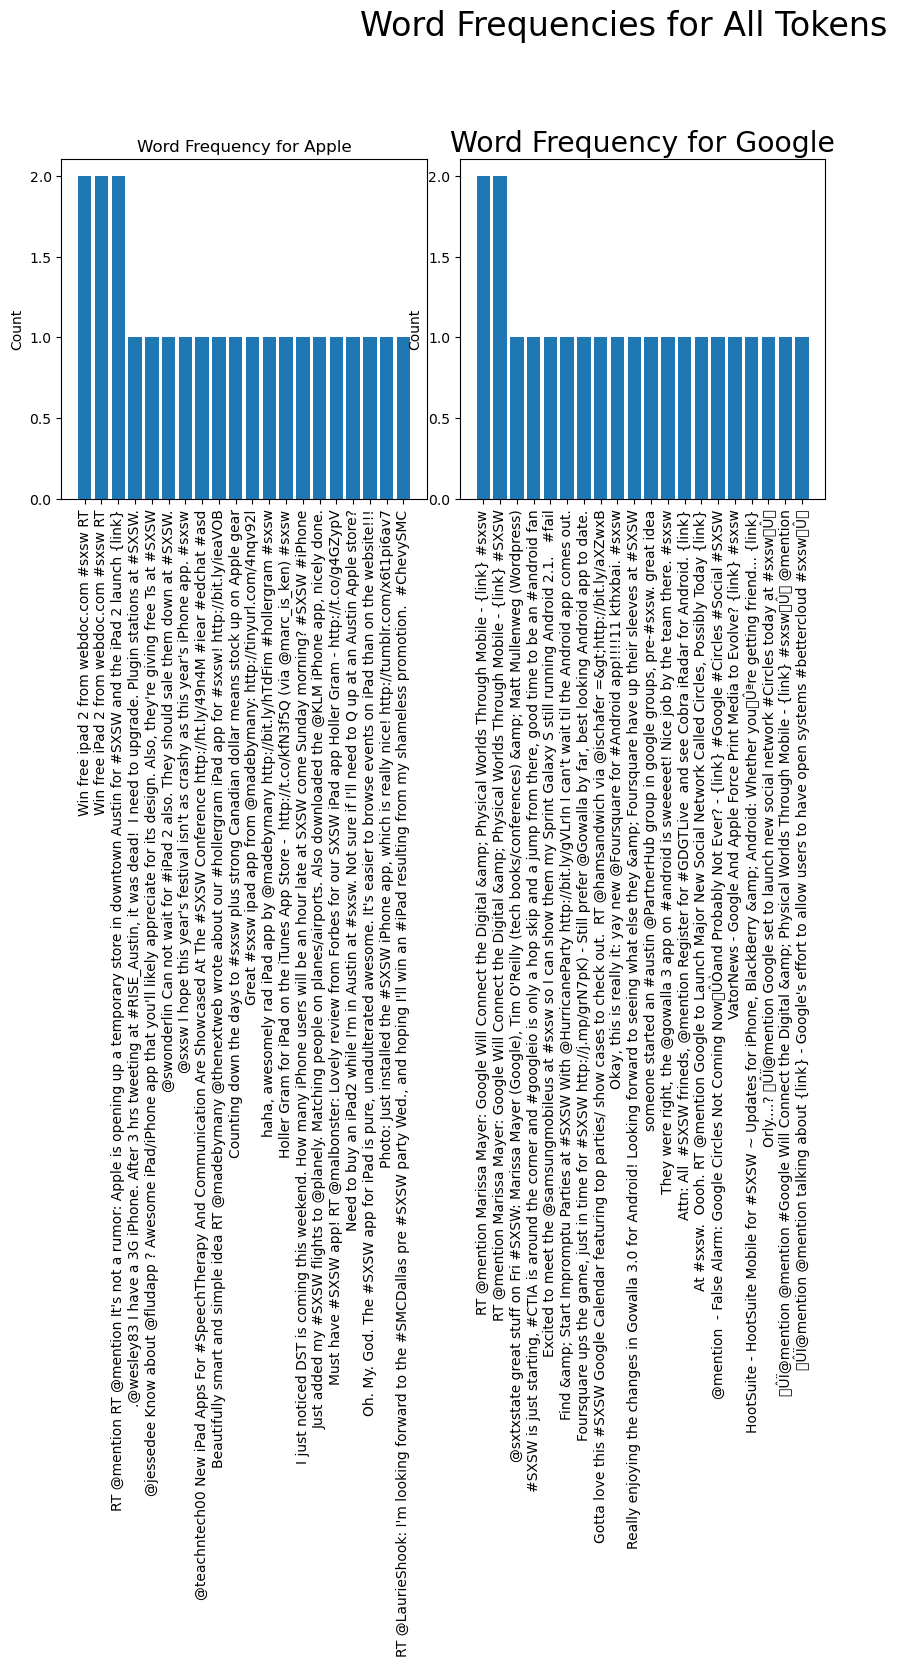

In [70]:
def setup_two_subplots():
    fig = plt.figure(figsize=(15,15))
    fig.set_tight_layout(True)
    gs = fig.add_gridspec(3, 6)
    ax1 = fig.add_subplot(gs[0, :2]) 
    ax2 = fig.add_subplot(gs[0, 2:4])
    
    return fig, [ax1, ax2,]

fig, axes = setup_two_subplots()

artnumberdict={'Apple':0,'Google':1,}

def plot_distribution_of_column_by_category(df, axes, title="Word Frequency for"):
    brand_most_common_words={}
    for key, value in artnumberdict.items():
        all_words=df[df["brand"] == key]['tweet_text'].explode()
        freq_dist = FreqDist(all_words)
        top_20 = list(zip(*freq_dist.most_common(20)))
        tokens = top_20[0]
        counts = top_20[1]
        ax=axes[value]
        ax.bar(tokens, counts)
        ax.set_title(f"{title} {key}")
        ax.set_ylabel("Count")
        ax.tick_params(axis="x", rotation=90)
        plt.rcParams.update({'font.size':17})

plot_distribution_of_column_by_category(df, axes)
fig.suptitle("Word Frequencies for All Tokens", fontsize=24);


The above are the top 20 most common words that need to be dropped. Among them are two uncommon stop words i.e: '#sxsw' which is the acronym for the South by SouthWest Film Festival and 'rt' which is a Twitter/X term for retweeting. They too need to be dropped.

### Removing Stop words

In [66]:
# Get the set of English stopwords
stop_words = set(stopwords.words('english'))
additional_stopwords = ["#sxsw", "sxsw", "sxswi", "#sxswi", "rt"]
stop_words.update(additional_stopwords)

# Function to remove stopwords from a list of tokens
def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]

# Apply the remove_stopwords function to the 'tokens' column
df['Tokens'] = df['Tokens'].apply(remove_stopwords)
#get the top 20 words
top_words = get_most_common_words(df, 'Tokens')
print(top_words)

C:\Users\Bee\AppData\Local\Temp\ipykernel_14744\1755010180.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tokens'] = df['Tokens'].apply(remove_stopwords)


<bound method Counter.most_common of FreqDist({'.': 5638, 'link': 3656, '}': 3642, '{': 3639, ',': 3320, 'ipad': 2410, '!': 2146, 'google': 2127, 'apple': 1812, '"': 1592, ...})>


Having dropped the acronyms in the ealier step, what's left of the stop words is punctuation, brand and product names which need to be dropped. This would not deter us from understanding what product/brand each tweet targets since they can be found in the 'Brand' column.

In [67]:
additional_stopwords = [
    "ipad", "google", "apple", "iphone", "amp",
    "android", "sxswi", "link", "#apple",
    "#google", "...", "\x89", "#ipad2",
    "0","1","2","3","4","5","6","7","8","9",
    "#iphone", "#android", "store", "austin", "#ipad"]
stop_words.update(additional_stopwords)

# Apply the remove_stopwords function to the 'tokens' column
df['Tokens'] = df['Tokens'].apply(remove_stopwords)
# Remove punctuation from the tokens
df['Tokens'] = df['Tokens'].apply(lambda tokens: [token for token in tokens if token not in string.punctuation])
#get most common words
top_words = get_most_common_words(df, 'Tokens')
print(top_words)

C:\Users\Bee\AppData\Local\Temp\ipykernel_14744\1916916710.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tokens'] = df['Tokens'].apply(remove_stopwords)
C:\Users\Bee\AppData\Local\Temp\ipykernel_14744\1916916710.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tokens'] = df['Tokens'].apply(lambda tokens: [token for token in tokens if token not in string.punctuation])


<bound method Counter.most_common of FreqDist({'new': 1042, 'app': 758, 'launch': 613, 'social': 607, 'circles': 555, 'today': 522, 'network': 446, 'pop-up': 419, 'via': 404, 'line': 401, ...})>


#### Check for most common words for Apple and Google products using POS

This is to to understand the remaining most common words better after having removed product/brand names, punctuations and acronyms from the stop words, if there's any other necessary words that need to be excluded from the list.

### Using Sentiment Intensity Analyzer with VADER to Build Our Target Variable

This section calculates sentiment scores using both TextBlob and VADER (from nltk). It assigns a sentiment label (negative or positive) based on the VADER scores. Here is a more streamlined version of your code, ensuring clarity and organization

In [68]:
#Calculating Negative, Positive, Neutral and Compound values
df_probs = pd.DataFrame()
df_probs[['polarity', 'subjectivity']] = df['tweet_text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Function to apply VADER sentiment analysis
def analyze_sentiment(text):
    score = sia.polarity_scores(text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    return pd.Series([neg, neu, pos, comp])

for index, row in df['tweet_text'].items():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        df_probs.loc[index, 'sentiment'] = 0
    elif pos > neg:
        df_probs.loc[index, 'sentiment'] = 1
    else:
        df_probs.loc[index, 'sentiment'] = 0
df_probs.head(10)

,polarity,subjectivity,sentiment
0,-0.250000,0.400000,0.0
1,0.466667,0.933333,1.0
2,-0.155556,0.288889,0.0
3,0.000000,0.000000,1.0
4,0.800000,0.750000,1.0
5,0.136364,0.454545,0.0
7,0.233333,0.566667,1.0
8,0.107143,0.500000,1.0
9,0.138889,0.511111,1.0
10,-0.062500,0.525000,1.0


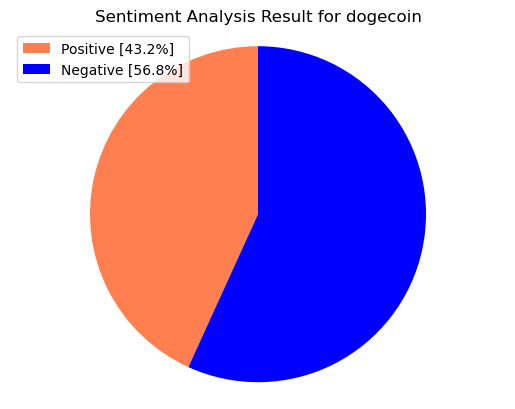

In [69]:
def percentage(part,whole):
 return 100 * float(part)/float(whole)

positive = format(percentage(df_probs[df_probs['sentiment'] == 1].shape[0],df_probs.shape[0]),'.1f')
negative = format(percentage(df_probs[df_probs['sentiment'] == 0].shape[0],df_probs.shape[0]),'.1f')

labels = ['Positive ['+str(positive)+'%]','Negative ['+str(negative)+'%]']

sizes = [positive, negative]
colors = ['coral', 'blue']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for dogecoin" )
plt.axis('equal')
plt.show()

In [72]:
#splitting up data in brands and emotions
apple = df[df["brand"]=="Apple"]
apple_pos = apple[apple["Emotion"]==1]
apple_nonpos = apple[apple["Emotion"]==0]
google = df[df["brand"]=="Google"]
google_pos = google[google["Emotion"]==1]
google_nonpos = google[google["Emotion"]==0]

KeyError: 'Emotion'